## AREA UNDER CURVE(ROC/AUC)

In [5]:
import pandas as pd
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
np.random.seed(42)

#create data

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]


#splitting data

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

#create classifier

clf=RandomForestClassifier()

#fit the model
clf.fit(x_train, y_train)

#evaluate the model

clf.score(x_test, y_test)

0.8524590163934426

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)


In [8]:
from sklearn.metrics import roc_curve

#fit the classifier
clf.fit(x_train, y_train)

#make prediction with probabilities
y_probs=clf.predict_proba(x_test)
y_probs[:10], len(y_probs)

(array([[0.66, 0.34],
        [0.62, 0.38],
        [0.07, 0.93],
        [0.47, 0.53],
        [0.38, 0.62],
        [0.39, 0.61],
        [0.32, 0.68],
        [0.84, 0.16],
        [0.33, 0.67],
        [0.13, 0.87]]),
 61)

In [9]:
y_probs_positive=y_probs[:, 1]
y_probs_positive[:10]

array([0.34, 0.38, 0.93, 0.53, 0.62, 0.61, 0.68, 0.16, 0.67, 0.87])

In [10]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds= roc_curve(y_test, y_probs_positive)

In [11]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.07407407, 0.07407407,
       0.11111111, 0.11111111, 0.14814815, 0.18518519, 0.18518519,
       0.2962963 , 0.2962963 , 0.40740741, 0.48148148, 0.48148148,
       0.55555556, 0.66666667, 0.74074074, 1.        ])

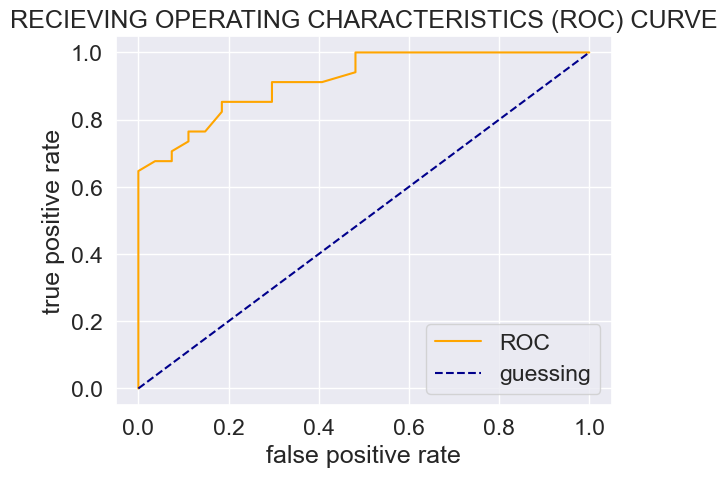

In [12]:
# create a func for plotting roc curve

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    #plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="guessing")
    #customize the plot
    plt.xlabel("false positive rate")
    plt.ylabel("true positive rate")
    plt.title("RECIEVING OPERATING CHARACTERISTICS (ROC) CURVE")
    plt.legend()
    plt.show()
plot_roc_curve(fpr, tpr)


In [13]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9172113289760349

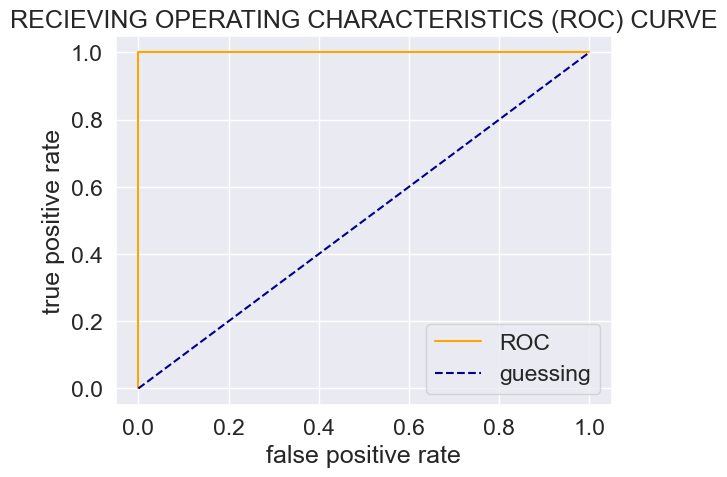

In [14]:
#plot perfect roc curve and auc score

fpr, tpr, thresholds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [15]:
roc_auc_score(y_test, y_test)

1.0

## Confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix

y_preds=clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[20,  7],
       [ 5, 29]], dtype=int64)

In [17]:
#visualize

pd.crosstab(y_test,
            y_preds,
            rownames=["actual labels"],
            colnames=["predict labels"])

predict labels,0,1
actual labels,,
0,20,7
1,5,29


In [ ]:
import sys
!conda install --yes --prefix

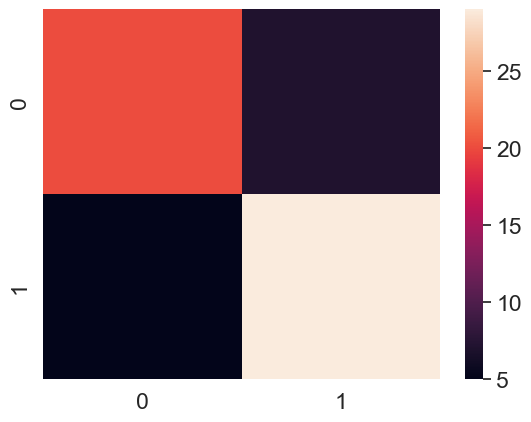

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);